# PAMPA2 HEARTRATE Vs CHEST TEMPERATURE ANALYSIS REPORT
## DATA ANALYSIS by Jovito Thomas

### Contents
#### 1.Overview

#### 2.Preparatory Tasks

#### 3.Data Cleaning

#### 4.Exploratory Data Analysis

#### 5.Data Correlation

#### 6.Hypothesis Testing

#### 7.Modelling

#### 7.Decisions

#### 8.Summary

#### 9.References

## 1) OVERVIEW

For this assignment, the dataset used is PAMAP2 which is a Activity Monitoring dataset which is covering 18 different physical activities which were taken by 9 different subjects, 8 men and 1 woman, the measurements were taken using 3 inertial measurement units and a heart rate monitor.

The main aim of this assignment would be to derive an insight from the dataset provided such that it can be used to create a software or a hardware which can be used to predict the type of the activities performed by the subjects.

There are three requirements for this assignment they are as follows:

Carrying out thorough exploratory data analysis and properly handling missing or dirty data.

Developing and testing at least one hypothesis for a relationship between a single pair of attributes.

Developing and testing at least one model which uses multiple attributes to make predictions.

## 2) DATA LOADING/ PREPARATORY TASKS

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import scipy.stats

*) We would need a list of the file names to be created in order to load all the files and create the dataframe.

*) we would also be required to create a dictionary that will hold the names as well as numbers of each different activity.

*) Lists for each different category of IMU's should be put together in order to have the column names for the dataframe. IMU's that will be used are for chest, ankle and hand.

*) The last step is to put together all the different lists to create the collection of the columns.

In [2]:
list_of_files = ['PAMAP2_Dataset/Protocol/subject101.dat',
                 'PAMAP2_Dataset/Protocol/subject102.dat',
                 'PAMAP2_Dataset/Protocol/subject103.dat',
                 'PAMAP2_Dataset/Protocol/subject104.dat',
                 'PAMAP2_Dataset/Protocol/subject105.dat',
                 'PAMAP2_Dataset/Protocol/subject106.dat',
                 'PAMAP2_Dataset/Protocol/subject107.dat',
                 'PAMAP2_Dataset/Protocol/subject108.dat',
                 'PAMAP2_Dataset/Protocol/subject109.dat' ]

In [3]:
subject_ID = [1,2,3,4,5,6,7,8,9]

activity_ID_dict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

columNames = ["time_stamp", "activity_ID","heartrate"]

IMU_hand = ['hand_Temperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'hand_Orntn1', 'hand_Orntn2', 'hand_Orntn3', 'hand_Orntn4']

IMU_chest = ['chest_Temperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chest_Orntn1', 'chest_Orntn2', 'chest_Orntn3', 'chest_Orntn4']

IMU_ankle = ['ankle_Temperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankle_Orntn1', 'ankle_Orntn2', 'ankle_Orntn3', 'ankle_Orntn4']

columns = columNames + IMU_hand + IMU_chest + IMU_ankle  #all columns in one list


In [4]:
Consolidated_data = pd.DataFrame()  # Loading the files and consolidating the data into a single dataset
for file in list_of_files:
    proto_Data = pd.read_table(file, header=None, sep='\s+')
    proto_Data.columns = columns
    proto_Data['subject_id'] = int(file[-5])
    Consolidated_data = Consolidated_data.append(proto_Data, ignore_index=True)

Consolidated_data.reset_index(drop=True, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\2881482827.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Consolidated_data = Consolidated_data.append(proto_Data, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20176\2881482827.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Consolidated_data = Consolidated_data.append(proto_Data, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20176\2881482827.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Consolidated_data = Consolidated_data.append(proto_Data, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20176\2881482827.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [5]:
Consolidated_data.head()

,time_stamp,activity_ID,heartrate,hand_Temperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankle_Orntn1,ankle_Orntn2,ankle_Orntn3,ankle_Orntn4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


## 3) Data cleaning

By going through the PerformedActivitiesSummary file and examining the consolidated dataset the following details were observed:

*) various data is missing and the readme file provided mentions there were some wireless disconnections in data collection. This has to be accounted for and made up in a way that it wont impact the analysis.

*) Each different activity has 8 or less subjects who did the activity and each different activity has NaN values for different subjects. Hence we would require some data filling.

*) There are NaN values in our data, it is best to use interpolate which is constructing a new data point out of a set of known data points. This would be most suitable in this scenario

I could also understand that activities with activity_ID = 0 are actually unusable for our analysis as it doesnt contain any significant data related to the activites performed by the subjects. Hence i would have to remove those as it would be very noisy and would impact our further analysis on the subject.

In [6]:
def cleansor(Consolidated_data):
        Consolidated_data = Consolidated_data.drop(['hand_Orntn1', 'hand_Orntn2', 'hand_Orntn3', 'hand_Orntn4',
                                             'chest_Orntn1', 'chest_Orntn2', 'chest_Orntn3', 'chest_Orntn4',
                                             'ankle_Orntn1', 'ankle_Orntn2', 'ankle_Orntn3', 'ankle_Orntn4'],
                                             axis = 1)  # removal of orientation columns as they are not needed
        Consolidated_data = Consolidated_data.drop(Consolidated_data[Consolidated_data.activity_ID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
        Consolidated_data = Consolidated_data.apply(pd.to_numeric) #removal of non numeric data in cells
        Consolidated_data = Consolidated_data.interpolate() #removal of any remaining NaN value cells by constructing new data points in known set of data points
        
        return Consolidated_data

In [7]:
Cleaned_data = cleansor(Consolidated_data)

In [8]:
Cleaned_data.reset_index(drop = True, inplace = True)


In [9]:
Cleaned_data['heartrate'].head(20) #Checking if the values after the first 4 values are 100.

0       NaN
1       NaN
2       NaN
3       NaN
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
14    100.0
15    100.0
16    100.0
17    100.0
18    100.0
19    100.0
Name: heartrate, dtype: float64

Heartrate still has NaN values because interpolation calculates the values around the NaN cell. Since the first cells are NaN it would be normal to generate new NaN values after interpolation.

In order to overcome this problem we are going to assume that the value of the first 4 cells as 100 since the values after the index 4 is 100. this will help in eliminating any NaN values from our dataset.

In [10]:
for i in range(0,4):
    Cleaned_data["heartrate"].iloc[i]=100

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\1950562988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cleaned_data["heartrate"].iloc[i]=100


converting the first 4 values into 100

In [11]:
Cleaned_data.head()

,time_stamp,activity_ID,heartrate,hand_Temperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1
1,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1
2,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1
3,37.69,1,100.0,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1
4,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1


In [12]:
Cleaned_data.isnull().sum() #Double checking if there are no NaN values left in the dataset

time_stamp           0
activity_ID          0
heartrate            0
hand_Temperature     0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
chest_Temperature    0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
ankle_Temperature    0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
subject_id           0
dtype: int6

## 4) EXPLORATORY DATA ANALYSIS

Before splitting our data, we need to check if the classes are balanced which would mean there is no requirment for stratification in our split. 

If classes weights are unbalanced, we should proceed with stratifying while splitting the data. Stratified sampling is the process of taking samples from all classes and putting them on the sub-sets created for train and test sets.

It will help in getting better results when the weight distribution of the classes is not normal. A Normal distribution would imply that each class' weight is similar with all other weights of classes.

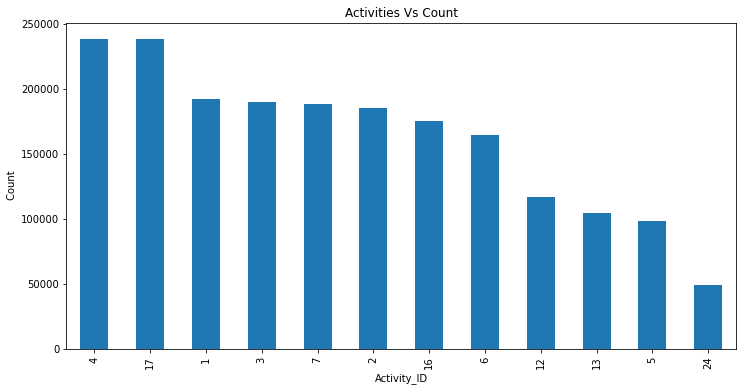

In [13]:
Cleaned_data['activity_ID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.title("Activities Vs Count")
plt.ylabel(" Count")
plt.xlabel("Activity_ID")
plt.show()

#### 4.1) SPLITTING INTO TRAIN AND TEST SETS

As the above plot shows, our classes are mostly balanced. Therefore, we proceed with splitting the data into train and test sets. 
The most commonly used split for proper analysis is a 80% split for train set and 20% for test set, which is the split fraction that will be used.

In [14]:
train_set = Cleaned_data.sample(frac=0.8, random_state=1)
test_set = Cleaned_data.drop(train_set.index)

As we know heart rate is a very good measure of how a person or a subject performs an activity.

An increased heart rate would imply the subject performed a heavy or cumbersome activity.

In order to understand which are the cumbersome activities, im plotting a bar chart showing the heart rate against the activities. This would give a further insight on the activities performed by the subject.

<AxesSubplot:title={'center':'Heart rate vs Activities'}, xlabel='activity_ID'>

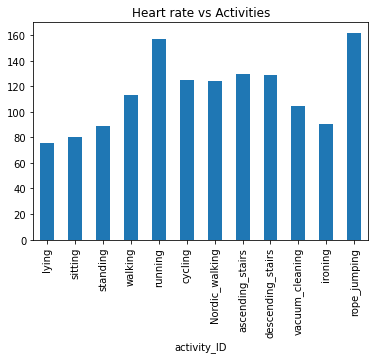

In [15]:
df_chesttem_act = train_set['heartrate'].groupby(train_set['activity_ID']).mean()
plt.title("Heart rate vs Activities")
df_chesttem_act.index = df_chesttem_act.index.map(activity_ID_dict)
df_chesttem_act.plot(kind='bar')

After analysing the above bar chart, i can understand that there are a few cumbersome activities which were performed by the subjects. Running and ropejumping seems to induce higher heart rates when compared to other activities.Hence im going to classify them as cumbersome activities in my analysis. 

Meanwhile, activities like cycling, nordik walking, walking etc has lower heart rates and we are going to classify them as non cumbersome activities for the analysis.

#### Medical Theory relating heart rate to body temperature: 

We know that we sweat alot during excersises, this is to reduce the body temperature when it gets high. Similarily, the brain prompts the heart to increase the flow of blood which inturn increases the heart rate. This would imply that the body temperature would decrease while doing cumbersome activites like running, ropejumping etc.

Im going to explore this relation with heart rate and temperature, focusing on chest temperature as it would probably show the best results for this analysis since the other temperature measurements in this dataset are from hands and ankles.


<AxesSubplot:xlabel='chest_Temperature', ylabel='heartrate'>

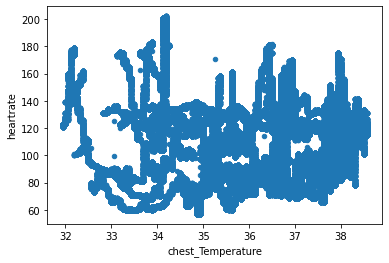

In [16]:
test_set.plot.scatter('chest_Temperature','heartrate')

From the scatter plot above we can make gather some insights. It shows that for lower values of chest Temperature the heart rate is high. since the data contains both the cumbersome and non cumbersome activities, it has a wide range of information.

we can see that somewhere near 34 Degree celsius chest temperature, the heart rate can go upto 200, which is the highest of the data set.

In [17]:
train_set.loc[:,['chest_Temperature']].mean()

chest_Temperature    36.179373
dtype: float64

The mean of the chest temperature is almost the normal body temperature, lets plot a box plot to determine the interquartile ranges.

[Text(0, 0.5, 'Temperature (C)')]

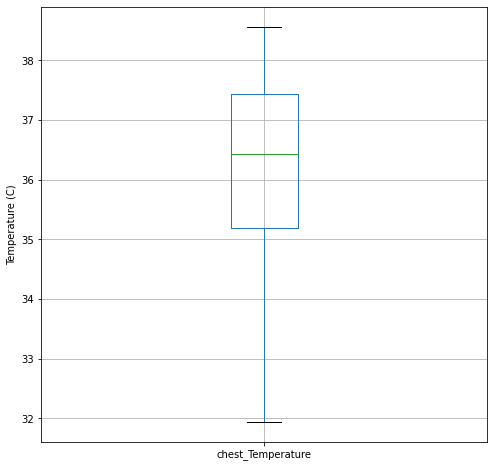

In [18]:
ax1=train_set.boxplot(['chest_Temperature'],figsize = (8,8))
ax1.set(ylabel='Temperature (C)')

From the box plot above we can understand the first quartile group out of the four starts from 31 degree celsius which is the lowest data point and finishes at 35.3 degree celsius, which also makes it our biggest group by looking at the size of it on the box plot compared to the other quartiles. Second group range starts from 35.3 to 37.6 degree celsius. the third group starts from the mean value at 36.1 till the interquartile range of 37.6 degree celsius. The fourth group starts from 37.6 to 38.5 degree celsius, which would be the highest data point in the dataset.

In order to see which activities have low chest temperature, i plot a bar chart showing chest temperature against activity ID.

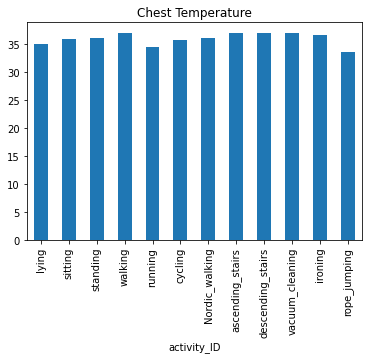

In [19]:
def chest_temp():
    df_handtem_act = train_set['chest_Temperature'].groupby(train_set['activity_ID']).mean()
    plt.title("Chest Temperature")
    df_handtem_act.index = df_handtem_act.index.map(activity_ID_dict)
    df_handtem_act.plot(kind='bar')
    
    
chest_temp()

we can see that the chest temperature is less for the cumbersome activities with high heartrate, These activities are Running and rope jumping. 

Hence we can say that the data for chest temperature follows the Medical studies which mentions that intense work leads to decrease in body temperature. 

#### 4.2) Deeper Analysis on the activities

Now im going to split the data according to their activity ID to get insights on the values obtained from the cumbersome activities and non cumbersome activities.

This seperation would give us insights on different values obtained from the subjects for just the selected activites.

I will be taking running as my cumbersome activtiy and walking as my non cumbersome activity.

In [20]:
running_data = train_set.loc[(train_set["activity_ID"] == 5)] # Creating a dataset with just the values for the activity running
walking_data = train_set.loc[(train_set["activity_ID"] == 4)] # Creating a dataset with just the values for the activity walking running

Now i plot the boxplot to perform further analysis on the chest temperature for the non cumbersome activity, which i have taken as walking.

[Text(0, 0.5, 'Temperature in Celsius(C)')]

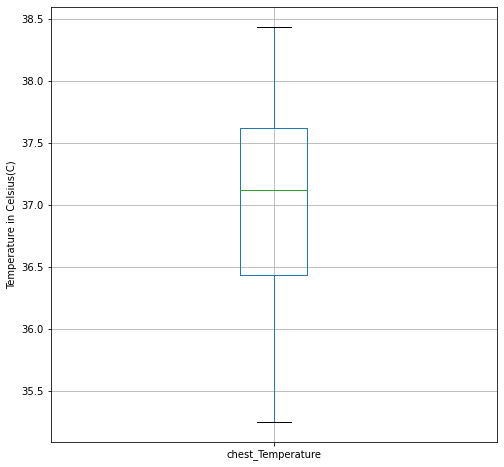

In [21]:
ax1=walking_data.boxplot(['chest_Temperature'],figsize = (8,8))
ax1.set(ylabel='Temperature in Celsius(C)')

we can see from the box plot that lowest data point in this dataset is 35.2 Degree Celsius and the highest will be 38.4 Degree Celsius and the mean will be around 37 degree celsius. We can see there is a slight negative skew from the boxplot.

We now check the box plot of the chest temperature for the activity Running in order to gather more insight.

[Text(0, 0.5, 'Temperature in Celsius(C)')]

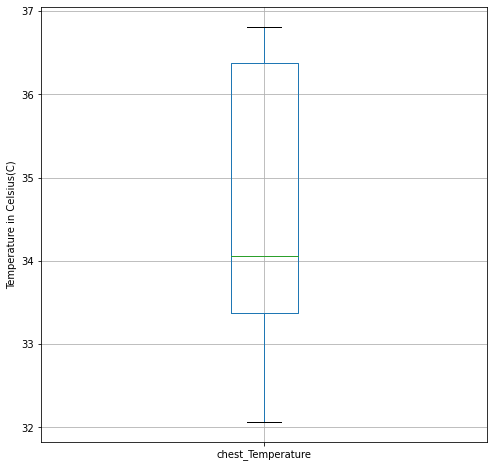

In [22]:
ax1=running_data.boxplot(['chest_Temperature'],figsize = (8,8))
ax1.set(ylabel='Temperature in Celsius(C)')

This boxplots has a positive skew with the lowest datapoint at 32.1 degree celsius and highest at 36.7 degree celsius. The mean will be 34.3 degree celsius.

From the above boxplots we can see the difference in chest temperature between cumbersome and non cumbersome activities.
which we will be further exploring.

## 5) DATA CORRELATION ANALYSIS

In order to find the correlation between the attributes in our dataset, we need to find the correlation coefficient.

we calculate the coefficient of correlation and create a correlation matrix so that we can plot a heatmap for easily visualising the correlation between the attributes.

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\1937695211.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(P_corr, mask=np.zeros_like(P_corr, dtype=np.bool), cmap = "Blues",ax=ax)


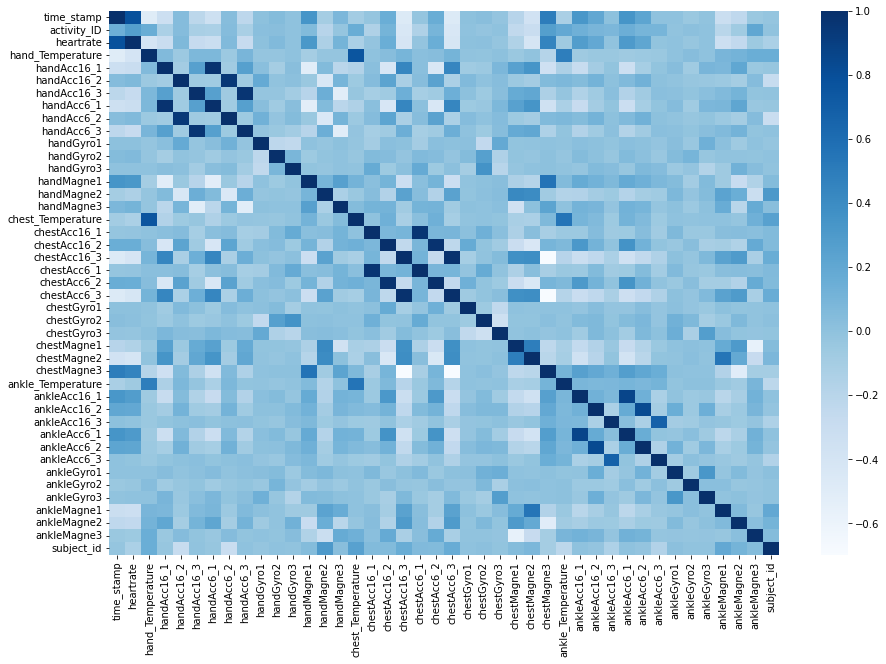

In [23]:
import seaborn as sns
from pandas.plotting import scatter_matrix
P_corr = train_set.corr()
P_corr = P_corr.drop(['activity_ID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(P_corr, mask=np.zeros_like(P_corr, dtype=np.bool), cmap = "Blues",ax=ax)
plt.show()

Our heatmap shows how much statistical similarity there is between our different columns.

From the heatmap we can see the correlation between chest temperature and hand temperature, the correlation between them seems to be high due to the fact the brain tries to balance the temperature of the body to the optimum value.

However we would be focusing more on chest temperature because hand temperature would have different factors which would heavily tamper with its values.
Some of them would, be wind friction while doing the activities which could decrease the hand temperature, and temperature of the surrounding enviornment which could either increase or decrease the body temperature.

We can also observe that the gyroscopes do not correlate with any of our other data and seem to not required in this model and for my analysis as im not conducting an analysis on movement of the subjects.

On the other hand we can understand the correlation between accelerometers of the hand. The two are strongly correlated on all three instances of hand accelerometers.

We can also see the correlation between chest magnetometers and heart rate, this was to be expected as they are close to each other.

## 6) Hypothesis Testing

The hypothesis would be:

If the activity performed by the subject is cumbersome(has high heart rate) then, the chest temperature of the subject would be lower when compared with other activities which induces lower heart rate.

For testing this hypothesis, we will be using Normal distribution. The first step is to construct confidence intervals for the cumbersome activity, in this case we are taking running as the cumbersome activity. The population mean of the chest temperature would lie between this CI.

#### 6.1) Constructing Confidence intervals for Chest temperature while Running

Im calculating the confidence interval at 95% level such that we can be 95% confident that the population mean would be between the upper and lower CI's 

In [24]:
upper_bound = running_data["chest_Temperature"].mean()+(1.96*running_data["chest_Temperature"].std())/running_data["chest_Temperature"].count()
print("Upper CI= {} Celsius".format(upper_bound))

Upper CI= 34.401122303041525 Celsius


In [25]:
lower_bound = running_data["chest_Temperature"].mean()-(1.96*running_data["chest_Temperature"].std())/running_data["chest_Temperature"].count()
print("Lower CI= {} Celsius".format(lower_bound))

Lower CI= 34.40105091727586 Celsius


From the above observation, we can be 95 % confident that the population mean for chest temperature while running would be between 34.4010< μ <34.4011 degree Celcius. The interval is small since there is little variation for chest temperature within the running dataset.

We use this information to assume the population mean for chest temperature when the activity is running as 34.39 Degree Celsius.

We can create the null and alternate hypothesis as follows:

#### Null hypothesis
H0 -> The mean of the chest temperature of the subject while Running is far greater than 34 degree Celsius.

#### Alternate Hypothesis
H1 -> The mean of the chest temperature of the subject while Running doesn't have a huge difference from 34 degree Celsius.

In [26]:
import scipy.stats

p = (running_data['chest_Temperature'].mean()-34.39) / (running_data['chest_Temperature'].std() / math.sqrt( running_data['chest_Temperature'].count() ))
pValue = 1 - scipy.stats.norm.cdf(p)

if pValue > 0.1:
    print("The p_value is ", pValue, " and h1 is rejected. The mean of the chest temperature of the subject while Running is far greater than 34 degree Celsius.")
else:
    print("The p_value is ", pValue, " \nh0 is rejected.\nThe mean of the chest temperature of the subject while Running doesn't have a huge difference from 34 degree Celsius.")

The p_value is  0.014870738910893189  
h0 is rejected.
The mean of the chest temperature of the subject while Running doesn't have a huge difference from 34 degree Celsius.


From the P value obtained we can understand that this is statisctically significant since it is less than the threshold of 0.05 at 95 % level.
Hence We can say that the mean of the chest temperature of the subject while running is close to 34.39 C and won't be greater.

We can use this information as an important point in the analysis as this should be compared with the mean chest temperature while the activity is walking (Non cumbersome activity)

### 6.2) Deeper Testing

To increase credibility of this hypothesis, im doing further testing to see if the population mean of the chest temperature for non cumbersome activities (In this case walking) would be higher than 34.38 C which was obtained for running.

#### 6.2.1) Constructing Confidence intervals for Chest temperature while walking

Calculating the confidence interval at 95% level such that we can be 95% confident that the population mean would be between the upper and lower CI's 

In [27]:
upper_bound = walking_data["chest_Temperature"].mean()+(1.96*walking_data["chest_Temperature"].std())/walking_data["chest_Temperature"].count()
print("upper CI=",upper_bound)

upper CI= 37.00913597715747


In [28]:
lower_bound = walking_data["chest_Temperature"].mean()-(1.96*walking_data["chest_Temperature"].std())/walking_data["chest_Temperature"].count()
print("Lower CI=",lower_bound)

Lower CI= 37.00911896847333


we can be 95 % confident that the population mean for chest temperature while walking would be between 37.00911< μ <37.00913 degree Celcius. The interval is small since there is little variation for chest temperature within the walking dataset.

Now let us check if the mean for the chest temperature of the subject while cycling is greater than 34.39 degree Celcius obtained while running.

By checking the Confidence interval, we can assume the population mean could be a little higher than 37 Degree Celcius.
Hence we are going to assume the value for population mean as 37 in order to calculate the P-value.

We are going to use normal distribution for the same and We verify it by calculating the P-value at 95% level.

In [29]:
p = (walking_data['chest_Temperature'].mean()-37) / (walking_data['chest_Temperature'].std() / math.sqrt( walking_data['chest_Temperature'].count() ))
pValue = 1 - scipy.stats.norm.cdf(p)
print ("P-Value =",pValue)

P-Value = 7.338785298349748e-07


we got a P-Value less than 0.05 which indicates this as statistically significant and we can be 95% confident that the population mean of the chest temperature while cycling will be very close to 37 Degree Celsius.

From the above tests we can verify that the chest temperature is higher for cycling (37 Degree Celsius) than for Running (34 Degree Celsius).
This supports my analysis on this dataset. In order to increase the credibility of the analysis, we need to take a few small samples from the running and walking dataset and perform bootstrapping and gather enough evidence that would support the analysis.

#### 6.3) BOOTSTRAPING

Bootstrapping is a resampling technique. Bootstrapping allows us to generate a distribution of estimates, rather than a single point estimate. Bootstrapping allows us to estimate uncertainty, allowing computation of confidence intervals.

Performing bootstraping would give more credibitly to the hypothesis.

The first step for bootstrapping is to collect a small sample from the runnind dataset. This will help in computing the Upper and lower Confidence Intervals.

In [30]:
smallsample=running_data['chest_Temperature'].dropna()[:100]
smallsample

1436799    33.1875
1165461    36.4375
1427969    33.3125
233529     33.6875
1422642    33.4375
            ...   
1429360    33.2500
1912392    34.1250
1917773    34.1875
1919095    34.1875
1912727    34.1250
Name: chest_Temperature, Length: 100, dtype: float64

In [31]:
import random
def bootstrap_sample(data):
    return [random.choice((data)) for _ in data]

smallsample = np.array(smallsample)
bootstrap_sample(smallsample)

[36.4375,
 34.0625,
 36.4375,
 33.75,
 33.1875,
 32.0625,
 36.625,
 32.3125,
 34.125,
 33.25,
 33.4375,
 33.9375,
 33.1875,
 36.4375,
 33.75,
 34.125,
 34.0,
 33.1875,
 34.1875,
 33.25,
 33.1875,
 33.6875,
 36.375,
 33.1875,
 36.4375,
 33.25,
 33.5,
 32.375,
 34.1875,
 33.6875,
 36.375,
 33.1875,
 34.1875,
 33.5625,
 36.375,
 32.375,
 33.6875,
 36.375,
 34.125,
 36.4375,
 34.1875,
 33.6875,
 33.1875,
 33.1875,
 36.4375,
 33.75,
 34.25,
 34.1875,
 33.1875,
 33.6875,
 33.3125,
 33.3125,
 32.4375,
 36.6875,
 34.125,
 34.1875,
 33.375,
 33.9375,
 33.1875,
 33.3125,
 36.375,
 33.4375,
 36.375,
 33.125,
 32.0625,
 33.1875,
 33.75,
 33.25,
 36.625,
 32.375,
 33.625,
 32.0625,
 33.6875,
 32.375,
 33.625,
 33.25,
 33.625,
 36.375,
 33.25,
 33.25,
 33.375,
 34.125,
 33.9375,
 33.1875,
 33.6875,
 34.0625,
 34.125,
 36.375,
 33.25,
 36.375,
 32.3125,
 33.1875,
 36.375,
 33.3125,
 34.25,
 36.4375,
 34.1875,
 33.3125,
 32.375,
 34.125]

In [32]:
bsmedian=[]
for i in range(1001):
    bs=bootstrap_sample(smallsample)
    #print bs
    #print np.median(bs)
    bsmedian.append(np.median(bs))

bsmedian_array=np.array(bsmedian)
print ("Bootstrapped Mean (of the median): ", np.mean(bsmedian_array))
print ("Bootstrapped CI Lower bound: ", np.percentile(bsmedian_array,2.5))
print ("Bootstrapped CI Upper bound: ", np.percentile(bsmedian_array,97.5))


Bootstrapped Mean (of the median):  33.78587037962038
Bootstrapped CI Lower bound:  33.65625
Bootstrapped CI Upper bound:  34.03125


The bootstrapped mean of the median is 33.78 degree celsius when the activity is running. According to my analysis this should be lower when compared with the chest temperature if the activity is walking.

In [33]:
chest_walking = walking_data['chest_Temperature'].dropna()[:100]

In [34]:
chest_walking_sample = np.array(chest_walking)

bsmean=[]
for i in range(1001):
    bs=bootstrap_sample(chest_walking_sample)
    bsmean.append(np.mean(bs))

bsmean_array=np.array(bsmean)
print ("Bootstrapped Mean: ", np.mean(bsmean_array))
print ("Bootstrapped CI Lower bound: ", np.percentile(bsmean_array,2.5))
print ("Bootstrapped CI Upper bound: ", np.percentile(bsmean_array,97.5))

Bootstrapped Mean:  37.126952422577425
Bootstrapped CI Lower bound:  36.964375
Bootstrapped CI Upper bound:  37.28


The bootstrapped Mean of the median for chest temperature while walking is 37.12 Degree Celsius which is higher than the mean obtained when the activity is running.

By examining the above values obtained by bootstraping we can say that the difference in the chest temperature of the subjects for both activites is pretty significant.

Hence, my hypothesis would be true and we can say that the mean chest temperature for the subject doing cumbersome activites(Like running, ropejumping etc) would be lower than the chest temperature for a subject doing non cumbersome activities (like walking, sitting etc).

## 7)  Modelling

A model in machine learning is the output of a machine learning algorithm which is run on data.
We can also say that a model is the “thing” that is saved after running a machine learning algorithm on training data and will represent the rules, numbers, and any other algorithm-specific data structures required to make predictions.

In order to continue with modelling, some variables have to be dropped which would impact our modelling precision.

After examining the dataset i found out that The variables which have to be dropped are Time_stamp and subject_id since they contain numeric numbers which the modelling method would use in its calculations.
Since their values doesn't hold any significance for our research, the modelling method used would have noise and predictions of accuracy would be inaccurate.

Hence we would be dropping the columns time_stamp and subject_id from the train dataset.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [36]:
train_set = train_set.drop(["time_stamp", "subject_id"],1) #Dropping Time_stamp and subject_id

C:\Users\HP\AppData\Local\Temp\ipykernel_20176\1321810796.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_set = train_set.drop(["time_stamp", "subject_id"],1) #Dropping Time_stamp and subject_id


In [37]:
train_set.head()

,activity_ID,heartrate,hand_Temperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
312921,3,90.000000,34.1875,-8.52981,4.712060,0.358276,-8.254460,4.955160,0.791698,-0.015127,...,-1.52904,9.716540,-1.51198,-1.00687,0.079272,-0.003718,-0.076595,-18.7246,-16.8796,36.806500
141735,12,167.909091,33.6875,-11.23140,2.967660,2.325040,-10.353600,2.978210,2.293150,-0.626024,...,-2.36217,11.137500,-1.30176,-2.51348,-0.276670,0.669698,-0.143689,-51.7218,33.8385,-6.571620
1191085,24,181.000000,33.8125,-1.77987,3.716760,-7.388680,-0.572605,3.958700,-4.197230,-3.711030,...,2.85123,-4.136650,-4.00683,2.16232,1.877290,-0.176273,-0.654045,-44.6465,-12.2168,0.272571
1206914,1,62.000000,33.4375,4.89177,-0.216854,8.273420,5.134350,-0.344501,8.596710,0.040396,...,-3.39332,-0.117976,-9.41168,-2.83626,-0.008012,0.002114,0.017758,-17.3221,26.4451,-4.782110
1710520,2,79.000000,34.3125,-1.96494,-9.487270,0.889387,-1.802600,-9.468570,1.058310,-0.017383,...,-2.71744,9.187270,2.90300,-2.15340,0.010209,0.011341,0.028921,-19.4371,15.8269,26.000300


### 7.1) Model selection

In this section of the report I will be training two models.
The data is supervised hence we would have to proceed with a supervised learning algorithm. There are a few supervised learning algorithms like Linear Regression, logistic regression, K Nearest neighbours, Decision tree regression etc.

Since the variables used in our analysis has a complex non linear relationship i would have to rule out linear regression model since it would have the least accuracy for predictions in this scenario.

Hence, We are going to focus on two modelling algorithms, K Nearest Neighbour and Decision Tree Regression.
These two modelling algorithms were used since they could better model the dataset and make more accurate predictions and are mostly non parametric modelling algorithms.

### 7.1.1) K Nearest Neighbour

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.It is also called as a lazy learners model.

While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

For this Model we will be using the training data set which contains the heart rate, chest temperature and activity ID which are the key attributes for this analysis.

The value of k would normaly be 7 or 14 which is optimal for smaller datasets. The dataset we are using contains large records of data and would require a more optimal value of K.

This optimal K value usually found is the square root of N, where N is the total number of samples.

In [38]:
dataset_test2 = test_set.loc[:,['heartrate','chest_Temperature','activity_ID']]         #Testing dataset
k = math.sqrt(dataset_test2['chest_Temperature'].count()) # Taking the value of K
k = int(k)
# Test Dataset
X_test2 = dataset_test2.drop('activity_ID', axis=1)
X_test2 = dataset_test2.loc[:,['heartrate','chest_Temperature']].values
y_test2 = dataset_test2['activity_ID'].values

dataset_train2 = train_set                                                     #Training dataset
x_train2 = dataset_train2.drop('activity_ID', axis=1)
x_train2 = dataset_train2.loc[:,['heartrate','chest_Temperature']].values
y_train2 = dataset_train2['activity_ID'].values

In [39]:

# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
    
knn = KNeighborsClassifier(n_neighbors=k)
  
knn.fit(x_train2,y_train2)


KNeighborsClassifier(n_neighbors=623)

In [40]:
y_pred = knn.predict(X_test2)

#### Accuracy calculation for K Nearest Neighbour:

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred = knn.predict(X_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred))

Accuracy: 0.8053961407608332


I have received an Accuracy of 0.805 for KNN, which means the accuracy of the model is 80% and it is considered to be good and realistic, since anything above the accuracy percentage of 70% is considered to be a good model which can make pretty accurate predictions and learn the data more effectively.

#### Limitations of the modelling algorithm:

There are a few limitations for this modelling algorithm they are as follows:

*) KNN takes lot of computing power and lots of memory, i had to scale down the X and Y values to just 100 values each in order to plot the model.

*) Due to limitation of computing power, creating a error plot or accuracy plot to find the most favorable K value is very time consuming. Hence we are using K as 14 to plot the model to gather the insights.

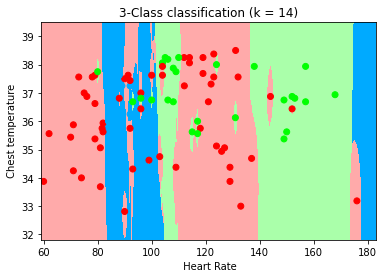

In [42]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


n_neighbors = 14


# prepare data
X = x_train2[:100]
y = y_train2[:100]
h = .02

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(" Heart Rate")
plt.ylabel(" Chest temperature")
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

As mentioned in the limitations above, due to high consumption of memory, model visualization was a challenge, the values plotted were not clustered properly due to incomplete data points which couldnt be plotted.

The number of data points for X and Y can be increased by the examiner to properly see the clustering, since it wont run on the computer im using for this analysis.

### 7.1.2) Decision Tree Regression

Decision Trees are a non-parametric supervised learning methods, they are capable of finding complex nonlinear relationships in the data. They can perform both classification and regression tasks. Which makes them a very powerful supervised learning model.

I have chosen this model because there seems to be a complex non linear relationship in the dataset between Heartrate and chest_Temperature which can be further trained and modelled by Decision Tree regression.

We create seperate datasets for test and training with chest temperature and heart rate values since these are the main attributes which we are performing the analysis on.

In [43]:

dataset= train_set.loc[:,['chest_Temperature','heartrate']]  #creating a dataset which contains only the required attributes
x_train = dataset.loc[:,['chest_Temperature']].values 
y_train = dataset['heartrate'].values

dataset_test = test_set.loc[:,['chest_Temperature','heartrate']]
# Test Dataset
X_test = dataset_test.loc[:,['chest_Temperature']].values
y_test = dataset_test['heartrate'].values

In [44]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(max_depth = 15, random_state = 0)

# fit the regressor with X and Y data
regressor.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=15, random_state=0)

We can try to predict a new value for heart rate using a certain value for chest temperature.

By doing this we can examine if our analysis is true by checking if the heart rate increases with decrease in chest temperature.
As per our analysis, chest temperature will have a mean value no more than 34.39 Degree celsius when the subject is running and the same would be 37 degree celsius when the subject is walking.

we can pass both the values and make a note of the heart rate predicted.

In [45]:
# predicting a new value

# test the output by changing values of chest temperature, example: 34 Celsius.
y_pred = regressor.predict([[37.38]])

# print the predicted price
print("Predicted heartrate: % d\n"% y_pred)


Predicted heartrate:  91



As we try to predict different values for Heart Rate using chest temperature, the Model predicts the data in the way expected by my research and supports my hypothesis. for higher values of chest temperature, the heart rate is lower.

This can be used to predict which type of activity the subject is doing or how effective the activity is.
This can also be used to monitor the heart rate of people with heart related complications who worksout.

If the chest temperature is getting way colder, it would mean there is a probability the heart would be struggling to pump blood through the body while excercising which make cause the subject to blackout. The software could trigger an alarm if the chest temperature goes below a certain threshold.

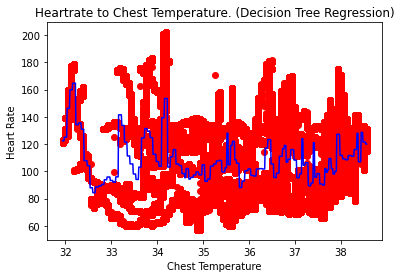

In [46]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X_test), max(X_test), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X_test, y_test, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Heartrate to Chest Temperature. (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Chest Temperature')
  
# specify Y axis label
plt.ylabel('Heart Rate')
  
# show the plot
plt.show()

The issue with the above model could be underfitting, in order to avoid underfitting as well as overfitting, we need to check if the correct parameters are used. This can be done doing a hyper parameter Tuning.

### 7.1.2) Hyper parameter Tuning, With K-fold cross Validation:

Tuning hyperparameters is done using the Grid Search method along with k-fold cross-validation.
The equivalent Scikit-learn function used is GridSearchCV. It finds all the hyperparameter combinations for a specified k number of folds.

the GridSearchCV function searches a combination and trains the model using those values along with doing k-fold cross-validation. It searches all the combinations (here 10 x 5= 50!). So, it executes 50 x k times!

In [47]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 10, 'min_samples_split': 10}
558.5965656294751


Using these values we will be able to create the a good model. It should be able to avoid both overfitting and underfitting conditions for the model.

Now we need to run the decision tree regression algorithm using the tuned parameters.

In [51]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(max_depth = 10, min_samples_split = 10)

# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [52]:
y_pred = regressor.predict(X_test)

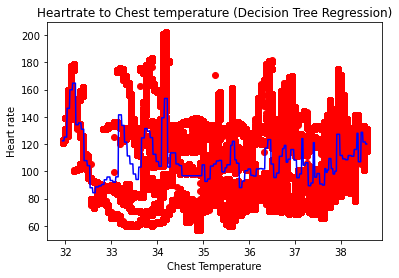

In [53]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X_test), max(X_test), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X_test, y_test, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Heartrate to Chest temperature (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Chest Temperature')
  
# specify Y axis label
plt.ylabel('Heart rate')
  
# show the plot
plt.show()

The above model should be best fit for the data, since there is a complex non linear relationship between our attributes.

## 8) SUMMARY

The analysis conducted has yielded results which would be significant to our problem statement.
The following are my observations:

1) The heart rate plays an important role in selecting the type of activity performed by the subject.

2) We can also add another parameter for checking or predicting the type of activity, which would be chest Temperature of the subject.

3) For activities inducing heavy heart rate, the chest temperature would be lower. A hypothesis was made and was tested to be statistically significant for the dataset provided.

4) Supervised learning algorithm is to be used for model creation for this dataset. using K Nearest Neighbours i got an accuracy of 80 percent for the model.

5) Decision Tree regression can be used to explore the non linear relationship between the heart rate and chest temperature attribute in the dataset. which can be used to predict the activity performed or how cumbersome of a activity the subject is performing by making use of just the chest temperature data.

6) The research conducted would help in the creation of a software that could trigger an alert to the subject whenever there is an abnormal change in the chest temperature (Gets lower than a threshold value). This could be due to the heart struggling to pump blood to keep the body temperature maintained during heavy workout sessions or activities.

### 9)  REFERENCES

Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring [Accessed 27 Dec. 2022].

PAMAP2_Dataset: Physical Activity Monitoring. (n.d.). [ebook] Available at: http://archive.ics.uci.edu/ml/machine-learning-databases/00231/readme.pdf [Accessed 27 Dec. 2022].

KNN using scikitlearn. [online] Available at: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
[Accessed 28 Dec 2022]

Optimal K Value calculations for KNN [online] Available at: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,the%20most%20favorable%20K%20value. [Accessed 28 Dec 2022]

Body temperature and Heart rate relation. [Online] Available at:https://www.hopkinsmedicine.org/health/conditions-and-diseases/exerciserelated-heat-exhaustion [Accessed 28 Dec 2022]

Decision Tree regression. [online] Available at: https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1
        [Acessed 2 jan 2023]